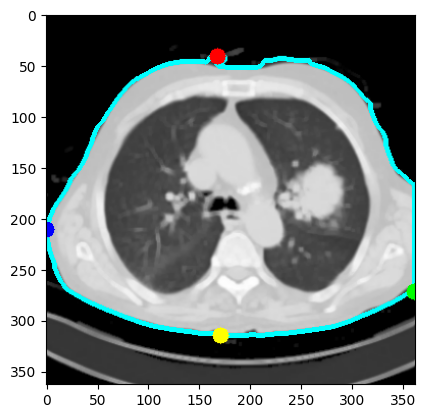

In [5]:

import cv2
import matplotlib.pyplot as plt
import imutils
import glob
import numpy as np


    

def contour(source):       
        
        gray = cv2.cvtColor(source, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_TOZERO)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        img_cnt = cv2.drawContours(source.copy(), [c], -1, (0, 255, 255), 4)
        img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
        plt.imshow(img_pnt)
        img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
        plt.imshow(img_pnt)
        img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
        plt.imshow(img_pnt)
        img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)
        plt.imshow(img_pnt)

        ADD_PIXELS = 0
        new_img = source[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        return new_img

if __name__ == '__main__':
    path = glob.glob("di.png")
    output_path='lung/contourm'
    c=0


    for file in path:
        source=cv2.imread(file)
        source1=contour(source)
        #cv2.imwrite(f'contourm/malignant{c}.png',source1)

        c+=1
        cv2.waitKey(0)

        cv2.destroyAllWindows()

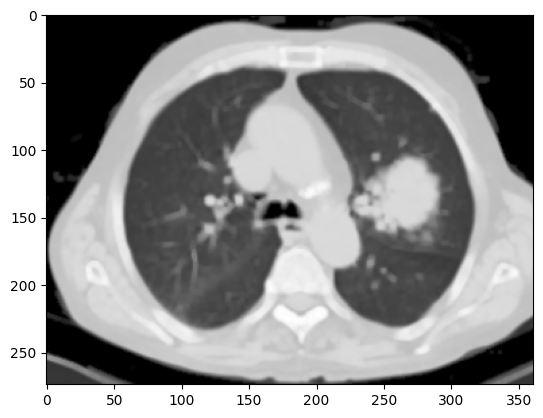

In [4]:
import cv2
import matplotlib.pyplot as plt
source=cv2.imread("di.png")
source1=contour(source)
plt.imshow(source1)